# Analisis de Resultados Entregados por el Optimizador

In [15]:
# Importamos las librerías
from os import path, listdir, getcwd
from pandas import read_csv
import matplotlib.pyplot as plt

In [77]:
# Creamos los dataframes con los archivos 
# Sacamos todos los archivos de la carpeta resultados
def get_dict_name():
    dict_names = {}
    dirname = path.dirname(getcwd())
    for arc in listdir(f'{dirname}/Resultados'):
        name = arc.split('__')
        if dict_names.get(name[0]):
            dict_names.get(name[0]).append(arc)
        else:
            dict_names[name[0]] = [arc]
    return dirname, dict_names
def get_df(var):
    dirname, dict_names = get_dict_name()
    names_files = dict_names.get(var)
    df1 = read_csv(f'{dirname}/Resultados/{names_files[0]}')
    df2 = read_csv(f'{dirname}/Resultados/{names_files[1]}')
    # creamos las listas para graficar
    dict_df1 = dict((df1.iloc[i][0], df1.iloc[i][1]) for i in range(df1.shape[0]))
    dict_df2 = dict((df2.iloc[i][0], df2.iloc[i][1]) for i in range(df2.shape[0]))
    dict_gen_df1, dict_gen_df2 = {},{}
    for key, value in dict_df1.items():
        gen = key.split("'")[1]
        if dict_gen_df1.get(gen):
            dict_gen_df1.get(gen).append(value)
        else:
            dict_gen_df1[gen] = [value]
    for key, value in dict_df2.items():
        gen = key.split("'")[1]
        if dict_gen_df2.get(gen):
            dict_gen_df2.get(gen).append(value)
        else:
            dict_gen_df2[gen] = [value]
    return dict_gen_df1, dict_gen_df2, names_files

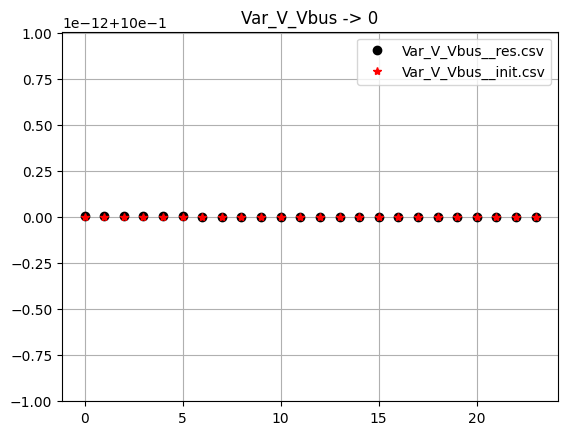

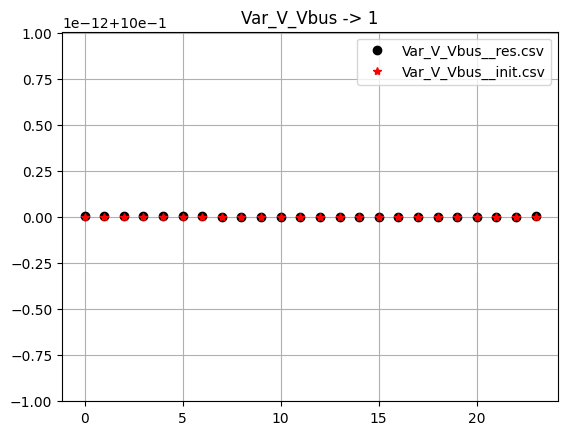

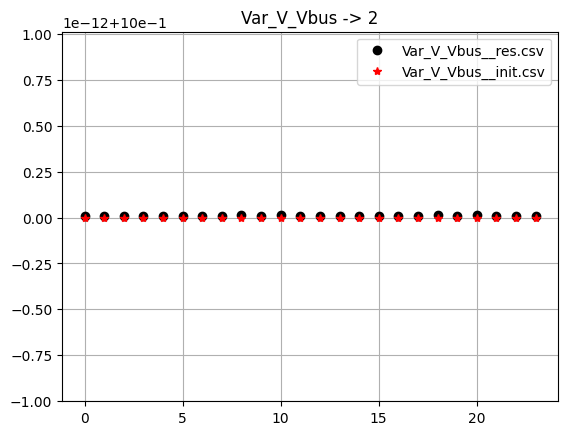

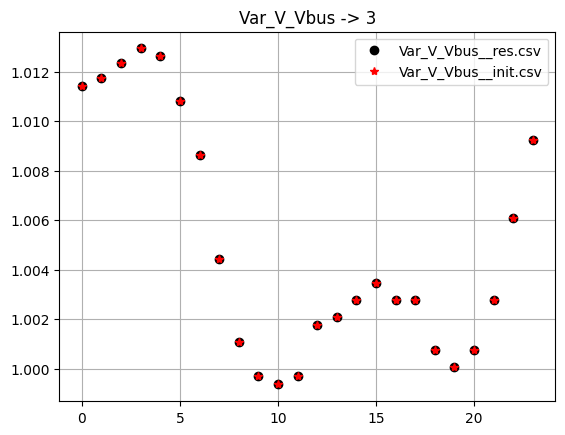

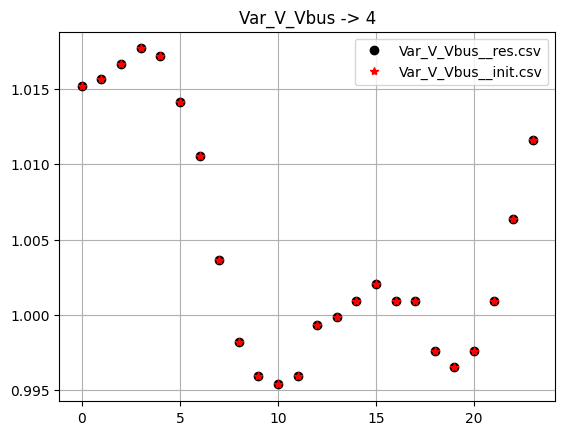

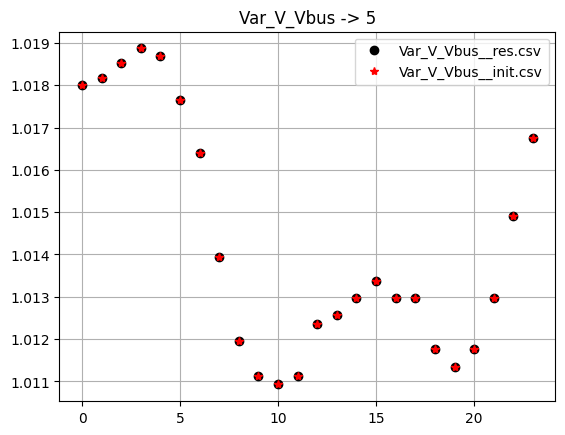

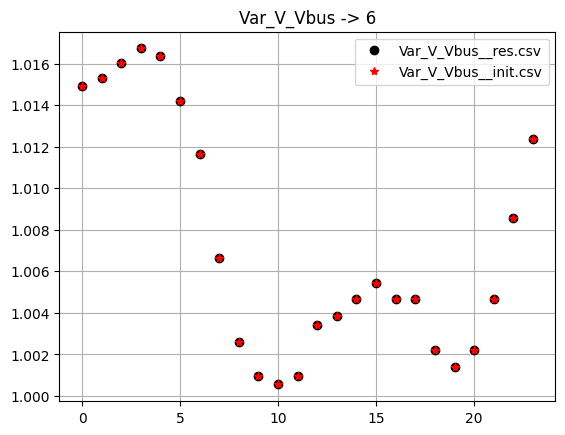

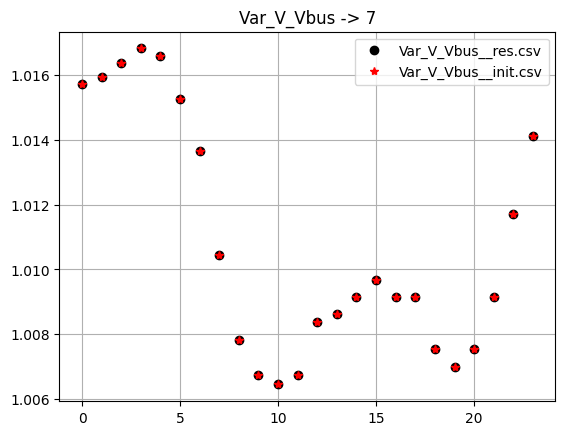

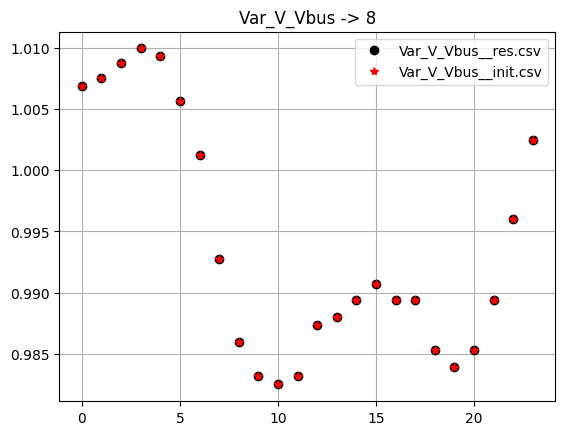

In [143]:
# graficamos
var = ['Var_V_Qgen','Var_V_Pgen','Var_V_Vbus', 'Var_V_Qslack'][2] 
dict_gen_df1, dict_gen_df2, names_files = get_df(var)
for key in dict_gen_df1:
    plt.plot(dict_gen_df2.get(key), 'o',mfc="k", mec="k", label=names_files[1])
    plt.plot(dict_gen_df1.get(key), 'r*', label=names_files[0])
    plt.title(f'{var} -> {key}')
    plt.legend()
    plt.grid()
    plt.show()
